In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as st
import math

In [2]:
# data path
random_name_head = './result/second/random/2024-02-14-11-42-19/'
random_save_path = random_name_head

rotating_name_head = './result/second/rotating/2024-07-18-16-17-59/'
rotating_save_path = rotating_name_head

# Data loading

In [3]:
random_Acc_test_ = 100 * np.load(random_name_head + 'Acc_test.npy')
random_Acc_testpre = 100 * np.load(random_name_head + 'Acc_testpre.npy')
random_Acc_10diff_train = 100 * np.load(random_name_head + 'Acc_10diff_train.npy')

rotating_Acc_test_ = 100 * np.load(rotating_name_head + 'Acc_test.npy')
rotating_Acc_testpre = 100 * np.load(rotating_name_head + 'Acc_testpre.npy')
rotating_Acc_10diff_train = 100 * np.load(rotating_name_head + 'Acc_10diff_train.npy')

# calculate data threshold

In [4]:
def getIndexes(y_predict, y_data):
    run = len(y_data)//10
    y_predict = np.tile(y_predict,run)
    n = y_data.size
    SSE=((y_data-y_predict)**2).sum()
    MSE=SSE/n
    RMSE=np.sqrt(MSE)
    u = y_data.mean()
    SST=((y_data-u)**2).sum()
    SSR=SST-SSE
    R_square=SSR/SST
    return SSE, MSE, RMSE, R_square

def func(x, miu, theta):    
    return st.norm.cdf((x-miu)/theta)

def get_threshold_permodel(data,threshold=75):
    base =0.5
    Y1 = (np.array(data)/100-base)/(1-base)
    run = len(Y1)//10
    X1_ = np.arange(0,10)
    X1 = np.tile(X1_,run)
    # set the boundary of the fitting parameters
    # the first tuple is the lower bound of the parameter, and the second tuple is the upper bound of the parameter
    bounds = ([0, 0], [30., 13.])
    (miu,theta), pcov = curve_fit(func, X1,Y1,bounds=bounds,maxfev=5000)
    data_p = func(X1_,miu,theta)*100*(1-base) + base*100
    SSE, MSE, RMSE, R_square = getIndexes(data_p, np.array(data))
    return st.norm.ppf((threshold/100-base)/(1-base))*theta+miu,R_square


### pre-train data threshold

In [5]:
random_pre_train_permodel = np.array([random_Acc_testpre[:,:,0,2,:]])
random_pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in random_pre_train_permodel]
random_pre_train_threshold_permodel_mean=np.mean(random_pre_train_threshold_permodel,axis=1)
random_pre_train_threshold_permodel_std=np.std(random_pre_train_threshold_permodel,axis=1)

rotating_pre_train_permodel = np.array([rotating_Acc_testpre[:,:,0,2,:]])
rotating_pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in rotating_pre_train_permodel]
rotating_pre_train_threshold_permodel_mean=np.mean(rotating_pre_train_threshold_permodel,axis=1)
rotating_pre_train_threshold_permodel_std=np.std(rotating_pre_train_threshold_permodel,axis=1)

/tmp/ipykernel_1761201/4070956684.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  R_square=SSR/SST
/home/lyumuyang/miniconda3/envs/pytorch/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:889: RuntimeWarning: divide by zero encountered in divide
  pcov = np.dot(VT.T / s**2, VT)


### conventional training data threshold

In [6]:
random_con_test_permodel = np.array([random_Acc_test_[:,:,0,2,:]])
random_con_test_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in random_con_test_permodel] 
random_con_train_threshold_permodel = [[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in random_Acc_10diff_train[0:]]

rotating_con_test_permodel = np.array([rotating_Acc_test_[:,:,0,2,:]])
rotating_con_test_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in rotating_con_test_permodel] 
rotating_con_train_threshold_permodel = [[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in rotating_Acc_10diff_train[0:]]

/tmp/ipykernel_1761201/4070956684.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  R_square=SSR/SST
/home/lyumuyang/miniconda3/envs/pytorch/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:889: RuntimeWarning: overflow encountered in divide
  pcov = np.dot(VT.T / s**2, VT)


# draw the figures

In [7]:
# every 20 batches one session, the last batch of each session shows the threshold
random_conventional_training_permodel = np.array([np.array(random_con_train_threshold_permodel)[:,10*(i+1)-1] for i in range(10)])
random_conventional_testing_permodel = np.array([np.array(random_con_test_threshold_permodel[0])[:,10*(i+1)-1] for i in range(10)])
random_conventional_training_permodel_mean = np.mean(random_conventional_training_permodel,axis=-1)
random_conventional_training_permodel_std = np.std(random_conventional_training_permodel,axis=-1)
random_conventional_testing_permodel_mean = np.mean(random_conventional_testing_permodel,axis=-1)
random_conventional_testing_permodel_std = np.std(random_conventional_testing_permodel,axis=-1)

rotating_conventional_training_permodel = np.array([np.array(rotating_con_train_threshold_permodel)[:,10*(i+1)-1] for i in range(10)])
rotating_conventional_testing_permodel = np.array([np.array(rotating_con_test_threshold_permodel[0])[:,10*(i+1)-1] for i in range(10)])
rotating_conventional_training_permodel_mean = np.mean(rotating_conventional_training_permodel,axis=-1)
rotating_conventional_training_permodel_std = np.std(rotating_conventional_training_permodel,axis=-1)
rotating_conventional_testing_permodel_mean = np.mean(rotating_conventional_testing_permodel,axis=-1)
rotating_conventional_testing_permodel_std = np.std(rotating_conventional_testing_permodel,axis=-1)

### random threshold

In [8]:
n=len(random_conventional_training_permodel[0])
n

100

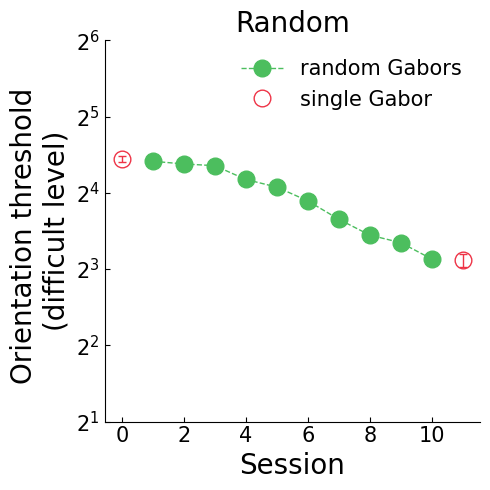

In [9]:
plt.style.use('default')

plt.figure(facecolor='white',figsize=(5,5))

ax = plt.axes()
ax.set_xticks([0,2,4,6,8,10,12])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15, direction='in')

# color
blue=(61/255,144/255,212/255)
red=(238/255,52/255,71/255)
green=(76/255,190/255,94/255)

plt.plot([0], 100, marker='o', color=green ,
        linestyle='--', linewidth=1, label='random Gabors',markersize=12)

plt.plot([0], 100,  marker='o', markeredgecolor=red, 
        linestyle='none', color=red, linewidth=1, markerfacecolor='none',label='single Gabor',markersize=12)


plt.errorbar(np.arange(1,11,1), random_conventional_training_permodel_mean, yerr=random_conventional_training_permodel_std/np.sqrt(n),marker='o', 
        linestyle='--', linewidth=1, markersize=12, capsize=3, markeredgecolor=green,color=green, ecolor=green)

plt.errorbar([0], random_pre_train_threshold_permodel_mean[0,-1], yerr=random_pre_train_threshold_permodel_std[0,-1]/np.sqrt(n), marker='o', markeredgecolor=red, 
        linestyle='none', color=red, ecolor=red, linewidth=1, markerfacecolor='none',markersize=12, capsize=3)

plt.errorbar([11], random_conventional_testing_permodel_mean[-1], yerr=random_conventional_testing_permodel_std[-1]/np.sqrt(n), marker='o', markeredgecolor=red, 
        linestyle='none', color=red, ecolor=red, linewidth=1, markerfacecolor='none', markersize=12, capsize=3)



# plt.yscale('symlog',)
plt.title('Random', fontsize=20)
plt.yscale('log', base=2)
plt.xlabel('Session', fontsize=20)
# plt.ylabel('Vernier offset (difficult level)', fontsize=20)
plt.ylabel('Orientation threshold \n(difficult level)', fontsize=20)
plt.ylim(2,64)

plt.legend(frameon=False, fontsize=15)
plt.tight_layout()

plt.savefig(random_save_path+'exp2_random_threshold_100.svg',dpi=300)

plt.show()

### rotating threshold

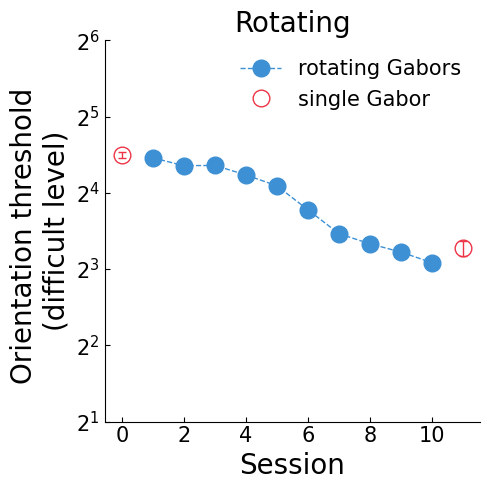

In [10]:
plt.style.use('default')
plt.figure(facecolor='white',figsize=(5,5))

ax = plt.axes()
ax.set_xticks([0,2,4,6,8,10,12])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15, direction='in')

# color
blue=(61/255,144/255,212/255)
red=(238/255,52/255,71/255)
green=(76/255,190/255,94/255)

plt.plot([0], 100, marker='o', color=blue ,
        linestyle='--', linewidth=1, label='rotating Gabors',markersize=12)

plt.plot([0], 100,  marker='o', markeredgecolor=red, 
        linestyle='none', color=red, linewidth=1, markerfacecolor='none',label='single Gabor',markersize=12)


plt.errorbar(np.arange(1,11,1), rotating_conventional_training_permodel_mean, yerr=rotating_conventional_training_permodel_std/np.sqrt(n),marker='o', 
        linestyle='--', linewidth=1, markersize=12, capsize=3, markeredgecolor=blue,color=blue, ecolor=blue)

plt.errorbar([0], rotating_pre_train_threshold_permodel_mean[0,-1], yerr=rotating_pre_train_threshold_permodel_std[0,-1]/np.sqrt(n), marker='o', markeredgecolor=red, 
        linestyle='none', color=red, ecolor=red, linewidth=1, markerfacecolor='none',markersize=12, capsize=3)

plt.errorbar([11], rotating_conventional_testing_permodel_mean[-1], yerr=rotating_conventional_testing_permodel_std[-1]/np.sqrt(n), marker='o', markeredgecolor=red, 
        linestyle='none', color=red, ecolor=red, linewidth=1, markerfacecolor='none', markersize=12, capsize=3)



# plt.yscale('symlog',)
plt.title('Rotating', fontsize=20)
plt.yscale('log', base=2)
plt.xlabel('Session', fontsize=20)
# plt.ylabel('Vernier offset (difficult level)', fontsize=20)
plt.ylabel('Orientation threshold \n(difficult level)', fontsize=20)
plt.ylim(2,64)

plt.legend(frameon=False, fontsize=15)
plt.tight_layout()

plt.savefig(rotating_save_path+'exp2_rotating_threshold_100.svg',dpi=300)

plt.show()

### random training & rotating improvement

In [11]:
random_train_permodel_o = np.array(random_conventional_training_permodel)[0,:]
random_test_permodel_o = np.array(random_pre_train_threshold_permodel)[0,:,-1]
random_train_permodel_c = np.array(random_conventional_training_permodel)[-1,:]
random_test_permodel_c = np.array(random_conventional_testing_permodel)[-1,:]

rotating_train_permodel_o = np.array(rotating_conventional_training_permodel)[0,:]
rotating_test_permodel_o = np.array(rotating_pre_train_threshold_permodel)[0,:,-1]
rotating_train_permodel_c = np.array(rotating_conventional_training_permodel)[-1,:]
rotating_test_permodel_c = np.array(rotating_conventional_testing_permodel)[-1,:]

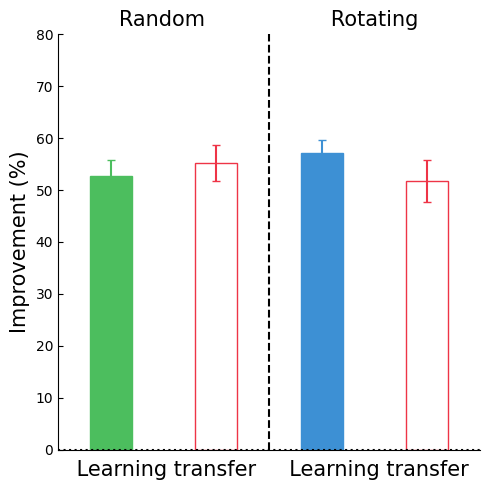

In [15]:
plt.style.use('default')

plt.figure(facecolor='white',figsize=(5,5))

ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in')
ax.tick_params(axis='x', which='major', length=0)
plt.xticks(np.arange(0,5,1),[])

y=[-(random_train_permodel_c-random_train_permodel_o)/random_train_permodel_o*100,\
                            -(random_test_permodel_c-random_test_permodel_o)/random_test_permodel_o*100,\

                                -(rotating_train_permodel_c-rotating_train_permodel_o)/rotating_train_permodel_o*100,\
                                    -(rotating_test_permodel_c-rotating_test_permodel_o)/rotating_test_permodel_o*100,\
                                        
                                    ]
edgecolor = [green,red,blue,red]

# color
blue=(61/255,144/255,212/255)
red=(238/255,52/255,71/255)
green=(76/255,190/255,94/255)

y_mean = np.mean(y,axis=-1)
y_err = np.std(y,axis=-1)
bar=plt.bar(np.arange(0,4,1),y_mean,color=[green,'white',blue,'white'],
                                    edgecolor = [green,red,blue,red],
                                    width= 0.4)
# Add error bars with matching colors
for i in range(len(bar)):
    plt.errorbar(i, y_mean[i], yerr=y_err[i]/math.sqrt(n), fmt='none', ecolor=edgecolor[i], capsize=3)
plt.vlines([1.5],ymin=0,ymax=80,linestyle='--',color='black')

plt.xlim([-0.5,3.5])
plt.ylim([0,80])
plt.hlines([0],xmin=-0.5,xmax=3.5,linestyle=':',color='black')

plt.title('Random                   Rotating', fontsize=15)
plt.xlabel(' Learning transfer     Learning transfer', fontsize=15)
plt.ylabel('Improvement (%)', fontsize=15)

plt.tight_layout()

plt.savefig(random_save_path+'exp2_improvement_100.svg',dpi=300)
plt.savefig(rotating_save_path+'exp2_improvement_100.svg',dpi=300)

plt.show()